# Heart Attack Classification

## Important Labraies

In [1]:
import numpy as np#for deals with array etc
import pandas as pd#importing dataset
import matplotlib.pyplot as plt#visulization
from sklearn.tree import DecisionTreeClassifier#model
from sklearn.model_selection import train_test_split#model
from sklearn.metrics import classification_report#model
from sklearn import metrics#evalution
from sklearn.metrics import auc, roc_curve, roc_auc_score#curve
#from plot_roc_curve import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier#model
from sklearn.linear_model import LogisticRegression#model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
import seaborn as sns#visulization

### Data Import

In [2]:
data = pd.read_csv('Heart_Failure.csv')
data.head()

,AGE,CREATININE,DIABETES OCCURS,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_SODIUM,GENDER,SMOKING/DRUGS,DEATH_OUTCOMES,GLUCOSE,HYPERTENSION,SERUM_CREATININE,ANAEMIA
0,75.0,582,0,20,1,265000.00,130,1,0,1,148,0,1.9,0
1,55.0,7861,0,38,0,263358.03,136,1,0,1,85,0,1.1,0
2,65.0,146,0,20,0,162000.00,129,1,1,1,183,0,1.3,0
3,50.0,111,0,20,0,210000.00,137,1,0,1,89,0,1.9,1
4,65.0,160,1,20,0,327000.00,116,0,0,1,137,1,2.7,1


### Data Explanation

Diabates Occures(0=no,1=yes)
Blood Pressure(1=High,0=low)
Gender(female=0,male=1)
Drugs(0=no,1=yes)
Death(1=die,0=alive)

In [3]:
print(data.shape)#shape
print(data.dtypes)#data types
print(data.isnull().sum())#null values

(291, 14)
AGE                    float64
CREATININE               int64
DIABETES OCCURS          int64
EJECTION_FRACTION        int64
HIGH_BLOOD_PRESSURE      int64
PLATELETS              float64
SERUM_SODIUM             int64
GENDER                   int64
SMOKING/DRUGS            int64
DEATH_OUTCOMES           int64
GLUCOSE                  int64
HYPERTENSION             int64
SERUM_CREATININE       float64
ANAEMIA                  int64
dtype: object
AGE                    0
CREATININE             0
DIABETES OCCURS        0
EJECTION_FRACTION      0
HIGH_BLOOD_PRESSURE    0
PLATELETS              0
SERUM_SODIUM           0
GENDER                 0
SMOKING/DRUGS          0
DEATH_OUTCOMES         0
GLUCOSE                0
HYPERTENSION           0
SERUM_CREATININE       0
ANAEMIA                0
dtype: int64


Data have no null values and have only int and float type data 

# Visulization of Data Isights

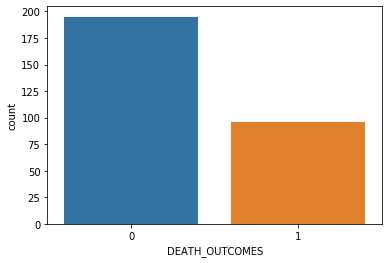

In [4]:
sns.countplot(x='DEATH_OUTCOMES', data=data);

now of alive person is greater than die

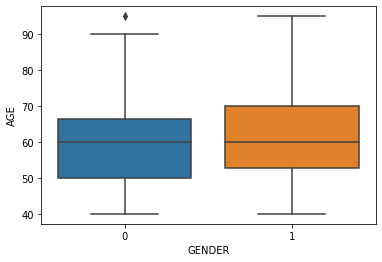

In [6]:
fig = sns.boxplot(y='AGE', x='GENDER', data=data);

Min Age in both Male and female is 40 year and max is 90 plus

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


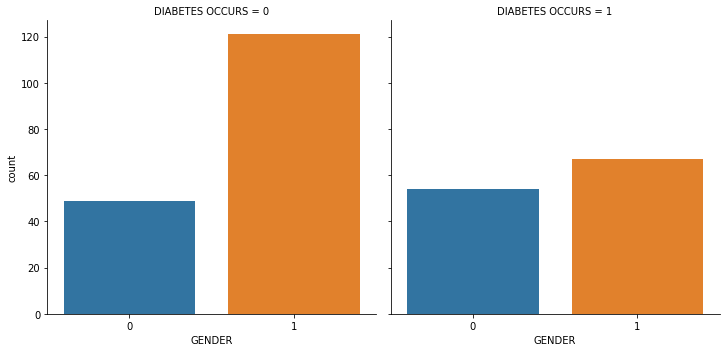

In [7]:
sns.factorplot(x='GENDER', col='DIABETES OCCURS', data=data, kind='count');

This show relation between Diabetes and Gender

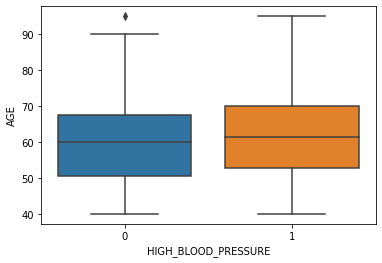

In [8]:
sns.boxplot(y='AGE', x='HIGH_BLOOD_PRESSURE', data=data);

show that most of high blood pressure rate is betwwen 60-65 age group peoples

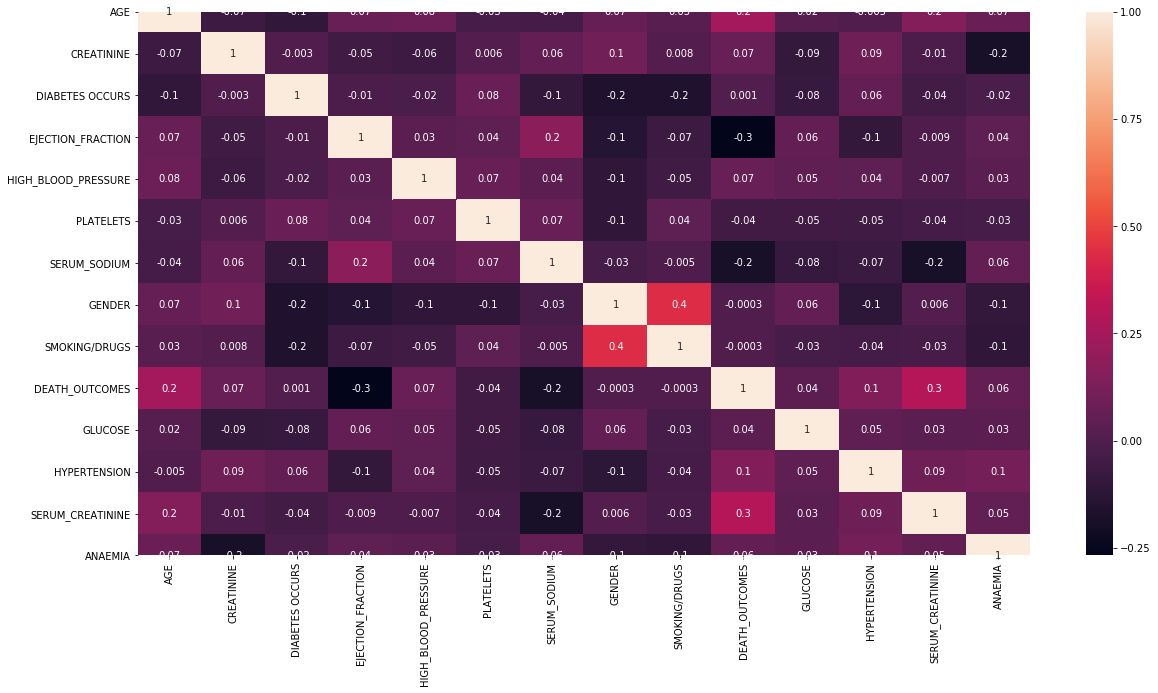

In [9]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True, fmt='.1g');

this show the co relation between Different Features

# Data Prepration

In [10]:
X = data.drop(['DEATH_OUTCOMES'], axis=1)#drop predictor
Y = data['DEATH_OUTCOMES']#only predictor

# Machine Learning Part

In [177]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=45) #test25% and train 75%

### Decision Tree

In [200]:
##Call Model
clf = DecisionTreeClassifier(criterion="gini", max_depth=4,random_state=45)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [231]:
dt_acc=(metrics.accuracy_score(y_test, y_pred))
dt_acc

0.7945205479452054

# Cross Validation

In [58]:
scores_dt = cross_val_score(clf, X_train, y_train, cv=5)
scores_dt

array([0.54545455, 0.84090909, 0.59090909, 0.58139535, 0.74418605])

In [96]:
scores_dt.mean()

0.6605708245243129

now try different parameters in Decision tress

In [150]:
#Call Model
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=100)
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
dt_pred_prb = clf.predict_proba(X_test)[:, 1]

In [151]:
dt_tune_acc=(metrics.accuracy_score(y_test, dt_pred))
dt_tune_acc

0.7534246575342466

In [61]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.14      0.25        21

    accuracy                           0.75        73
   macro avg       0.87      0.57      0.55        73
weighted avg       0.82      0.75      0.68        73



### ROC Curve

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

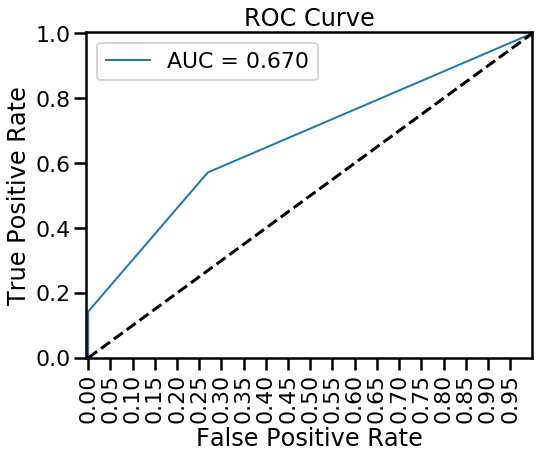

In [63]:
sns.set_context('poster')
auc_dt = roc_auc_score(y_test, dt_pred_prb)
fpr, tpr, threshold = roc_curve(y_test, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

# SVM

In [136]:
svm = SVC()
svm = svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [137]:
svm_acc=(metrics.accuracy_score(y_test, svm_pred))
svm_acc

0.7123287671232876

# KNN Classifier

In [123]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
KNN_acc=knn.score(X_test, y_test)
KNN_acc

0.6712328767123288

### Random Forest

In [67]:
clf_rf = RandomForestClassifier(criterion='entropy',random_state=45)

In [68]:
clf_rf.fit(X_train, y_train)
rf_pred= clf_rf.predict(X_test)

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
rf_acc=(metrics.accuracy_score(y_test, rf_pred))
rf_acc

0.7534246575342466

In [70]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.62      0.38      0.47        21

    accuracy                           0.75        73
   macro avg       0.70      0.64      0.65        73
weighted avg       0.74      0.75      0.73        73



### Logistic Regression

In [71]:
lr_model = LogisticRegression(random_state=45)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
lr_acc=(metrics.accuracy_score(y_test, lr_pred))
lr_acc

0.7123287671232876

In [73]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.50      0.33      0.40        21

    accuracy                           0.71        73
   macro avg       0.63      0.60      0.61        73
weighted avg       0.69      0.71      0.69        73



# Algo_comparison/Results

In [87]:
Algo_comparison={"Algorithms":["Logistic Reg","Random Forest","Decision Tree","Tune Decision Tree",'SVM','KNN'],
                 "Accuracy":[lr_acc,rf_acc,dt_acc,dt_tune_acc,svm_acc,KNN_acc]               
                }

In [88]:
comparison = pd.DataFrame(Algo_comparison)
comparison.sort_values(['Accuracy'], ascending=False)

,Algorithms,Accuracy
2,Decision Tree,0.794521
1,Random Forest,0.753425
3,Tune Decision Tree,0.753425
0,Logistic Reg,0.712329
4,SVM,0.712329
5,KNN,0.602740


# plot

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


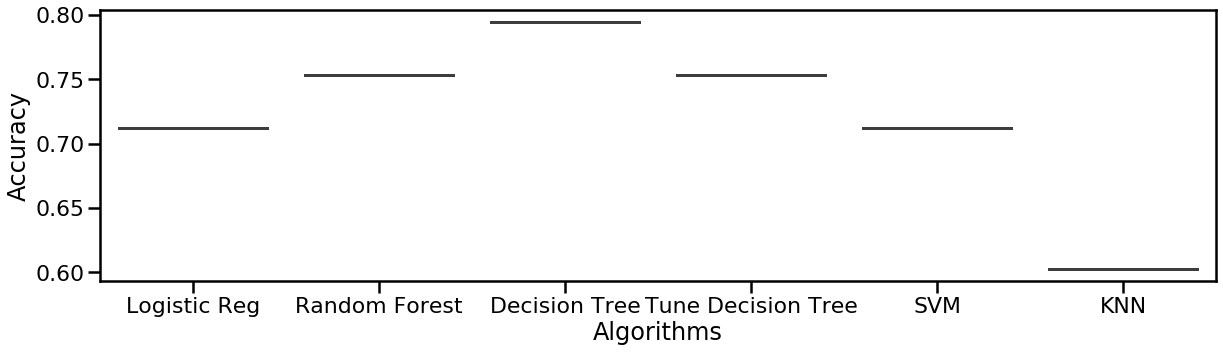

In [95]:
plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
sns.boxplot(y='Accuracy', x='Algorithms', data=comparison);
plt.show()   

for this problem we try different algos like Random forest,Logistic Regression,Decision Tree,and also try by tunning them,to get good results

Decision Tress is the Best choice for this problem if we consider Accuarcy but if we also consider recall and Precision then the result is different

### Logistic Regression Classification Report

In [76]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.50      0.33      0.40        21

    accuracy                           0.71        73
   macro avg       0.63      0.60      0.61        73
weighted avg       0.69      0.71      0.69        73



### Random Forest Classification Report

In [77]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.62      0.38      0.47        21

    accuracy                           0.75        73
   macro avg       0.70      0.64      0.65        73
weighted avg       0.74      0.75      0.73        73



### Tune Decision Tree Classification Report

In [78]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.14      0.25        21

    accuracy                           0.75        73
   macro avg       0.87      0.57      0.55        73
weighted avg       0.82      0.75      0.68        73



Now For in case of Recall and Precision we chose other alogo in best case

Decision is tottaly base on Our Requirement